In [7]:
from data_loader import FootballDataLoader
from data_visualizer import Visualizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [8]:
# === Setup paths ===
data_dir = "/Users/denizadiguzel/FootballData_FromMathias_May2025/RestructuredData_2425"
team = "FCK"
save_dir = "/Users/denizadiguzel/"  # Optional, used if save=True

# === Initialize loader ===
loader = FootballDataLoader(data_dir, team)

# === Load multiple games ===
datasets = loader.load_all_games(
    n_games= 1,                     # Or use "all" to load everything
    in_play_only=False,            # Only use frames when game is in play
    speed=False,                  # Skip speed column
    z=False,                      # Skip z-coordinate
    use_artificial_players=True,  # Use fixed player slots (0–10)
    every_n=2,                    # Downsample: keep every 5th frame
    save=False,                   # Don’t save to disk
    verbose=(False, False)        # Don’t print shapes or show plots
)

# === Inspect shape of each game ===
for i, df in enumerate(datasets):
    print(f"Game {i}: shape = {df.shape}")

Reading game 1: Game_LYN_FCK_Score_0_2_Day_2024-07-22Z.pkl
Loading Game_LYN_FCK_Score_0_2_Day_2024-07-22Z.pkl
Data read.
Game 0: shape = (75062, 72)


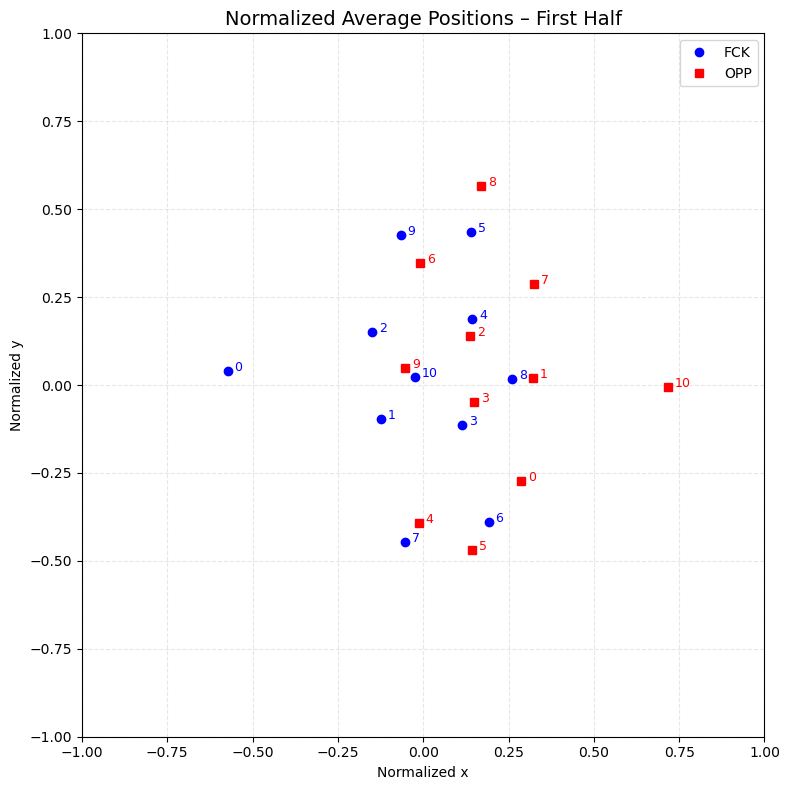

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# === Use first game and filter for first half ===
df = datasets[0]
df_first_half = df[df["half"] == 1]

# === Player slot IDs ===
player_ids = list(range(11))
fck_x = [f"FCKplayer_{i}_x" for i in player_ids]
fck_y = [f"FCKplayer_{i}_y" for i in player_ids]
opp_x = [f"OPPplayer_{i}_x" for i in player_ids]
opp_y = [f"OPPplayer_{i}_y" for i in player_ids]

# === Compute mean positions ===
mean_fck_x = df_first_half[fck_x].mean()
mean_fck_y = df_first_half[fck_y].mean()
mean_opp_x = df_first_half[opp_x].mean()
mean_opp_y = df_first_half[opp_y].mean()

# === Get min and max from all player coordinates (FCK + OPP) ===
all_x_vals = df_first_half[fck_x + opp_x].values.flatten()
all_y_vals = df_first_half[fck_y + opp_y].values.flatten()
x_min, x_max = np.nanmin(all_x_vals), np.nanmax(all_x_vals)
y_min, y_max = np.nanmin(all_y_vals), np.nanmax(all_y_vals)

# === Normalize to [-1, 1] ===
norm_fck_x = 2 * (mean_fck_x - x_min) / (x_max - x_min) - 1
norm_fck_y = 2 * (mean_fck_y - y_min) / (y_max - y_min) - 1
norm_opp_x = 2 * (mean_opp_x - x_min) / (x_max - x_min) - 1
norm_opp_y = 2 * (mean_opp_y - y_min) / (y_max - y_min) - 1

# === Plotting ===
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Normalized Average Positions – First Half", fontsize=14)
ax.set_xlabel("Normalized x")
ax.set_ylabel("Normalized y")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(True, linestyle="--", alpha=0.3)

# Plot FCK players
for i in player_ids:
    x = norm_fck_x[f"FCKplayer_{i}_x"]
    y = norm_fck_y[f"FCKplayer_{i}_y"]
    ax.plot(x, y, "o", color="blue", label="FCK" if i == 0 else "")
    ax.text(x + 0.02, y, f"{i}", fontsize=9, color="blue")

# Plot OPP players
for i in player_ids:
    x = norm_opp_x[f"OPPplayer_{i}_x"]
    y = norm_opp_y[f"OPPplayer_{i}_y"]
    ax.plot(x, y, "s", color="red", label="OPP" if i == 0 else "")
    ax.text(x + 0.02, y, f"{i}", fontsize=9, color="red")

ax.legend(loc="upper right")
plt.tight_layout()
plt.show()
